<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

# [Scénario d'Apprentissage Statistique](https://github.com/wikistat/Apprentissage)

# Modélisation de données d'enquête en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> 
# Prévision du seuil de revenu 

#### Résumé
Analyse du revenu ou plutôt du dépassement d'un seuil de revenu sur des données issues d'un sondage aux USA. Modélisation et prévision du dépassement d'un seuil de revenu. Comparaison de la pertinence et de l'efficacité de différentes méthodes de modélisation ou apprentissage.
## Introduction
Des données publiques disponibles sur le site [UCI repository](http://archive.ics.uci.edu/ml/) sont extraites de la base de données issue du recensement réalisé aux Etats Unis en 1994. Ces données son largement utilisées et font référence comme outil de *benchmark* pour comparer les performances de méthodes d’apprentissage ou modélisation statistique. L’objectif est  de prévoir la variable binaire « revenu annuel » (`income`) supérieur ou inférieur à 50k$. Il ne s’agit pas encore de données massives mais, en concaténant les fichiers fournis d'apprentissage et de test, 48841 individus sont décrits par les 14 variables du tableau ci-dessous. La phase préliminaire de préparation et exploration des données est décrite dans un scénario de la [Saison 2: Exploration](https://github.com/wikistat/Exploration). Les codes de préparation des données sont rapidement repris afin de démarrer du même jeu de données.

Num| Libellé |	Ensemble de valeurs
-|--|--|--
1|`Age`|	real
2|	`workClass`|	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
3|	`fnlwgt`|	real
4|	`education`|	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
5|	`educNum`|	integer
6|	`mariStat`|	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
7|	`occup`|	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
8|	`relationship`|	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
9|	`origEthn`|	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
10|	`sex`|	Female, Male
11|	`capitalGain`|	real  
12|	`capitalLoss`|	real
13|	`hoursWeek`|	real
14|	`nativCountry`|	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
15|	`income`|		incHigh (>50K), incLow (<=50K)

Une première étape permettant de vérifier, sélectionner, recoder les données, a permis de construire un fichier de type `.csv` qui est utilisé dans ce calepin.

http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

https://github.com/wikistat/Fair-ML-4-Ethical-AI/blob/master/AdultCensus/AdultCensus-R-biasDetection.ipynb


**Répondre aux questions en s'aidant des résultats des exécutions**.

## 1 Préparation des données
### 1.1 Lecture  

Lire les données présentes  dans le répertoire courant. 

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
%matplotlib inline
# Importations 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
adult=pd.read_csv('/content/drive/My Drive/adultTrainTest.csv')
adult.head()

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1.2 Préparation des données

Un travail important de nettoyage des données doit être réalisé pour supprimer les données manquantes, éviter des erreurs de codage, regrouper des modalités bien trop nombreuses, éliminer des variables redondantes. Cette étape de préparation et d'exploration est réalisée dans la [saison 2- exploration](https://github.com/wikistat/Exploration). Seuls sont reproduits ci-dessous les codes permmant la rpéapration du fichier.

In [0]:
def create_categorical_data(df, column_name):
    cat_columns = pd.Categorical(df[column_name], ordered=False)
    return cat_columns

In [0]:
print(np.sort(adult["mariStat"].unique()))

[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']


In [0]:
# mariStat
cat_name_dic = {" Never-married": "Never-Married", " Married-AF-spouse": "Married",
                " Married-civ-spouse": "Married", " Married-spouse-absent": "Not-Married",
                " Separated": "Not-Married", " Divorced": "Not-Married", " Widowed": "Widowed"}
adult['mariStat'] = adult.mariStat.map(cat_name_dic)

In [0]:
print(np.sort(adult["mariStat"].unique()))

['Married' 'Never-Married' 'Not-Married' 'Widowed']


In [0]:
print(np.sort(adult["nativCountry"].unique()))

[' ?' ' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba'
 ' Dominican-Republic' ' Ecuador' ' El-Salvador' ' England' ' France'
 ' Germany' ' Greece' ' Guatemala' ' Haiti' ' Holand-Netherlands'
 ' Honduras' ' Hong' ' Hungary' ' India' ' Iran' ' Ireland' ' Italy'
 ' Jamaica' ' Japan' ' Laos' ' Mexico' ' Nicaragua'
 ' Outlying-US(Guam-USVI-etc)' ' Peru' ' Philippines' ' Poland'
 ' Portugal' ' Puerto-Rico' ' Scotland' ' South' ' Taiwan' ' Thailand'
 ' Trinadad&Tobago' ' United-States' ' Vietnam' ' Yugoslavia']


In [0]:
# nativCountry
cat_country = {" Cambodia": "SE-Asia", " Canada": "British-Commonwealth", " China": "China", " Columbia": "South-America",
               " Cuba": "Other", " Dominican-Republic": "Latin-America", " Ecuador": "South-America",
               " El-Salvador": "South-America", " England": "British-Commonwealth", " France": "Euro_1",
               " Germany": "Euro_1", " Greece": "Euro_2", " Guatemala": "Latin-America", " Haiti": "Latin-America",
               " Holand-Netherlands": "Euro_1", " Honduras": "Latin-America", " Hong": "China", " Hungary": "Euro_2",
               " India": "British-Commonwealth", " Iran": "Other", " Ireland": "British-Commonwealth", " Italy": "Euro_1",
               " Jamaica": "Latin-America", " Japan": "Other", " Laos": "SE-Asia", " Mexico": "Latin-America",
               " Nicaragua": "Latin-America", " Outlying-US(Guam-USVI-etc)": "Latin-America", " Peru": "South-America",
               " Philippines": "SE-Asia", " Poland": "Euro_2", " Portugal": "Euro_2", " Puerto-Rico": "Latin-America",
               " Scotland": "British-Commonwealth", " South": "Euro_2", " Taiwan": "China", " Thailand": "SE-Asia",
               " Trinadad&Tobago": "Latin-America", " Vietnam": "SE-Asia", " United-States": "United-States",
               " Yugoslavia": "Euro_2"}
adult["nativCountry"] = adult.nativCountry.map(cat_country)

In [0]:
print((adult["nativCountry"].unique()))

['United-States' 'Other' 'Latin-America' 'British-Commonwealth' nan
 'Euro_2' 'Euro_1' 'SE-Asia' 'South-America' 'China']


In [0]:
print(np.sort(adult["education"].unique()))

[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']


In [0]:
# education
cat_educ = {" 10th": "Dropout", " 11th": "Dropout", " 12th": "Dropout", " 1st-4th": "Dropout", " 5th-6th": "Dropout",
            " 7th-8th": "Dropout", " 9th": "Dropout", " Assoc-acdm": "Associates", " Assoc-voc": "Associates",
            " Bachelors": "Bachelors", " Doctorate": "Doctorate", " HS-grad": "HS-grad", " Masters": "Masters",
            " Preschool": "Dropout", " Prof-school": "Prof-School", " Some-college": "HS-Graduate"}
adult["education"] = adult.education.map(cat_educ)

In [0]:
print(np.sort(adult["education"].unique()))

['Associates' 'Bachelors' 'Doctorate' 'Dropout' 'HS-Graduate' 'HS-grad'
 'Masters' 'Prof-School']


In [0]:
print(np.sort(adult["workClass"].unique()))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [0]:
# workClass
cat_work = {" Federal-gov": "Federal-Govt", " Local-gov": "Other-Govt", " State-gov": "Other-Govt", " Private": "Private",
            " Self-emp-inc": "Self-Employed", " Self-emp-not-inc": "Self-Employed", " Without-pay": "Not-Working",
            " Never-worked": "Not-Working"}
adult["workClass"] = adult.workClass.map(cat_work)

In [0]:
print((adult["workClass"].unique()))

['Other-Govt' 'Self-Employed' 'Private' 'Federal-Govt' nan 'Not-Working']


In [0]:
print(np.sort(adult["occup"].unique()))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [0]:
# occup
cat_occup = {" Adm-clerical": "Admin", " Craft-repair": "Blue-Collar", " Exec-managerial": "White-Collar",
             " Farming-fishing": "Blue-Collar", " Handlers-cleaners": "Blue-Collar", " Machine-op-inspct": "Blue-Collar",
             " Other-service": "Service", " Priv-house-serv": "Service", " Prof-specialty": "Professional",
             " Protective-serv": "Other-occups", " Sales": "Sales", " Tech-support": "Other-occups",
             " Transport-moving": "Blue-Collar"}
adult["occup"] = adult.occup.map(cat_occup)

In [0]:
print(adult["occup"].unique())

['Admin' 'White-Collar' 'Blue-Collar' 'Professional' 'Service' 'Sales'
 'Other-occups' nan]


In [0]:
print(np.sort(adult["origEthn"].unique()))

[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']


In [0]:
# origEthn
cat_orig = {" White": "CaucYes", " Black": "CaucNo", " Amer-Indian-Eskimo": "CaucNo", " Asian-Pac-Islander": "CaucNo",
            " Other": "CaucNo"}
adult["origEthn"] = adult.origEthn.map(cat_orig)

In [0]:
print(np.sort(adult["origEthn"].unique()))

['CaucNo' 'CaucYes']


In [0]:
adult["LcapitalGain"] = np.log(1 + adult["capitalGain"])
adult["LcapitalLoss"] = np.log(1 + adult["capitalLoss"])

# capital
def quantileCapitalGain(capital):
    if type(capital) != int:
        result = np.nan
    elif capital <= 0:
        result = "None"
    elif capital <= np.median(adult[adult["capitalGain"] > 0]["capitalGain"]):
        result = "cgLow"
    else:
        result = "cgHigh"
    return result


adult["capitalGain"] = list(map(quantileCapitalGain, adult.capitalGain))

def quantileCapitalLoss(capital):
    if type(capital) != int:
        result = np.nan
    elif capital <= 0:
        result = "None"
    elif capital <= np.median(adult[adult["capitalLoss"] > 0]["capitalLoss"]):
        result = "clLow"
    else:
        result = "clHigh"
    return result


adult["capitalLoss"] = list(map(quantileCapitalLoss, adult.capitalLoss))

In [0]:
adult["ageQ"] = pd.qcut(adult.age, 5, labels=["Ag1", "Ag2", "Ag3", "Ag4", "Ag5"])

In [0]:
adult["hoursWeekQ"] = pd.cut(adult.hoursWeek, bins=np.array([0, 39, 41, 100]), labels=["HW1", "HW2", "HW3"])

In [0]:
def create_categorical_data_rename(df, column_name, cat_name_dic):
    cat_columns = pd.Categorical(df[column_name], ordered=False)
    new_categorie = [cat_name_dic[old_name] for old_name in cat_columns.categories]
    return cat_columns.rename_categories(new_categorie)

In [0]:
print(np.sort(adult["income"].unique()))

[' <=50K' ' >50K']


In [0]:
adult["income"] = create_categorical_data_rename(adult, "income", {" <=50K": "incLow", " >50K": "incHigh"})

In [0]:
for name in ["workClass", "education", "mariStat", "occup", "relationship", "origEthn", "sex", "capitalGain", 
             "capitalLoss", "nativCountry"]:
    adult[name] = create_categorical_data(adult, name)

In [0]:
adult = adult[np.logical_not(adult.isnull().any(axis=1))]
adult.head()

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,CaucYes,Male,cgLow,None,40,United-States,incLow,7.684784,0.0,Ag3,HW2
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,CaucYes,Male,None,None,13,United-States,incLow,0.000000,0.0,Ag4,HW1
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,CaucYes,Male,None,None,40,United-States,incLow,0.000000,0.0,Ag3,HW2
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,CaucNo,Male,None,None,40,United-States,incLow,0.000000,0.0,Ag5,HW2
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,CaucNo,Female,None,None,40,Other,incLow,0.000000,0.0,Ag2,HW2


In [0]:
adult = adult[(adult["sex"] != "Female") | (adult["relationship"] != "Husband")]
adult = adult[(adult["sex"] != "Male") | (adult["relationship"] != "Wife")]

### 1.3 Description élémentaire

In [0]:
adult.describe()

,age,fnlwgt,educNum,hoursWeek,LcapitalGain,LcapitalLoss
count,45208.000000,4.520800e+04,45208.000000,45208.000000,45208.000000,45208.000000
mean,38.550035,1.897257e+05,10.118298,40.937776,0.740792,0.355432
std,13.218340,1.056474e+05,2.552960,12.007784,2.466579,1.595791
min,17.000000,1.349200e+04,1.000000,1.000000,0.000000,0.000000
25%,28.000000,1.173810e+05,9.000000,40.000000,0.000000,0.000000
50%,37.000000,1.783120e+05,10.000000,40.000000,0.000000,0.000000
75%,47.000000,2.379155e+05,13.000000,45.000000,0.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99.000000,11.512925,8.379539


**Q** Que dire de la distribution de la variable `age`, de celle `income` ?

**R** Répartition non gaussienne de l'age. La majorité sont entre 20 et 50 ans  
**R** De la même manière, il y a 3 fois plus de incLow que de incHigh

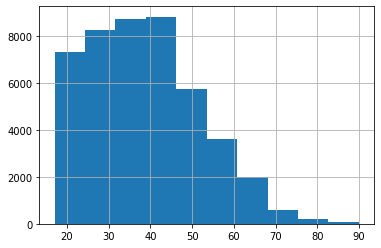

In [0]:
adult["age"].hist()
plt.show()

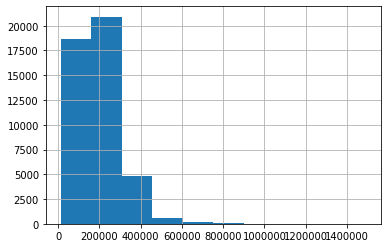

In [0]:
adult["fnlwgt"].hist()
plt.show()

In [0]:
adult["income"].value_counts()

incLow     34004
incHigh    11204
Name: income, dtype: int64

In [0]:
adult["relationship"].value_counts()

 Husband           18661
 Not-in-family     11697
 Own-child          6624
 Unmarried          4788
 Wife               2091
 Other-relative     1347
Name: relationship, dtype: int64

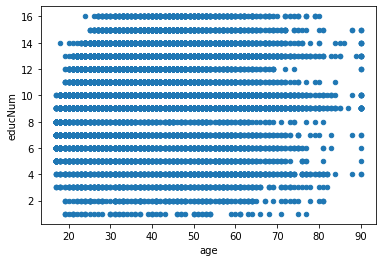

In [0]:
adult.plot(kind="scatter",x="age",y="educNum")
plt.show()

**Q** Que dire des liaisons : `age x hoursWeek`, `age x income`, `sex x income` ?  
**R** Age et hoursweek ne sont pas indépendantes, on voit clairement une diminution du temps travaillé par semaines avec l'age.  
**R** Age et income sont également liés, avec une moyenne d'age plus élevée chez les incHigh  
**R** Age et sexe semble aussi liés (les proportions male/female dans incHigh et incLow sont différentes)

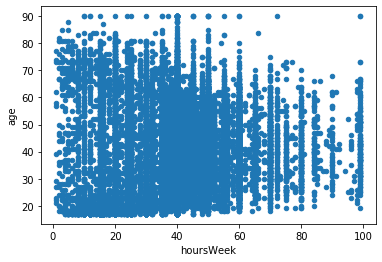

In [0]:
adult.plot(kind="scatter",x="hoursWeek",y="age")
plt.show()

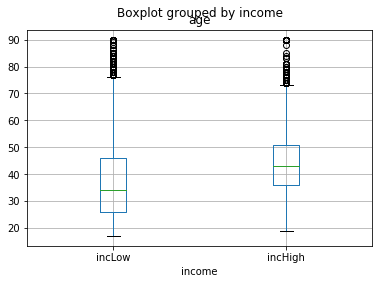

In [0]:
adult.boxplot(column="age",by="income")
plt.show()

**Q** La variable `fnlwgt` (Final sampling weight:  Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups) est assez obscure.  Que dire de sa liaison avec la variable cible? Elle est supprimée par la suite

**R** La liaison entre income et fnlwgt n'est pas évidente, fnlwgt ayant la même moyenne pour incLow et incHigh.

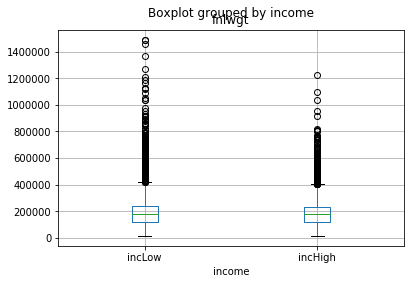

In [0]:
adult.boxplot(column="fnlwgt",by="income")
plt.show()

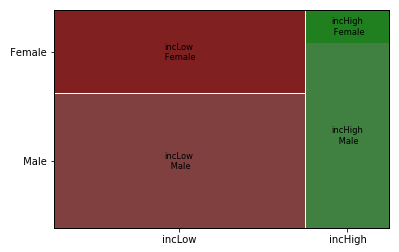

In [0]:
# Mosaic plots
from statsmodels.graphics.mosaicplot import mosaic
mosaic(adult,["income","sex"])
plt.show()

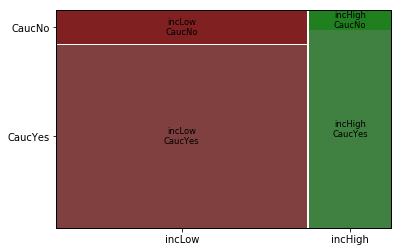

In [0]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(adult,["income","origEthn"])
plt.show()

Quelques modifications comlémentaires sont apportées de la base. Certaines variables en versions quantitatives et qualitatives comme le nombre d'heures par semaine, l'âge ou le niveau d'éducation sont conservées. Des variables sont supprimées afin de ne garder qu'une seule présence d'une information sensible: genre et origine ethnique.
- Suppression de la variable `fnlwgt` qui n'a guère de signification pour cette analyse.
- Création d'une variable binaire `Child`: présence ou non d'enfants.
- Suppression de la variable `relationship` redondante avec le genre et le statut marital,
- Suppression de la variable `nativCountry` redondante avec l'origine ethnique.

In [0]:
print(np.sort(adult["relationship"].unique()))

[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']


In [0]:
cat_orig = {' Husband':"ChildNo",' Not-in-family':"ChildNo",' Other-relative':"ChildNo",' Own-child':"ChildYes",' Unmarried':"ChildNo",' Wife':"ChildNo"}
adult["child"] = adult.relationship.map(cat_orig)

In [0]:
print(adult["child"].unique())

['ChildNo' 'ChildYes']


In [0]:
adult=adult.drop(["fnlwgt","nativCountry","relationship"],axis=1)

In [0]:
adult.head()

,age,workClass,education,educNum,mariStat,occup,origEthn,sex,capitalGain,capitalLoss,hoursWeek,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ,child
0,39,Other-Govt,Bachelors,13,Never-Married,Admin,CaucYes,Male,cgLow,None,40,incLow,7.684784,0.0,Ag3,HW2,ChildNo
1,50,Self-Employed,Bachelors,13,Married,White-Collar,CaucYes,Male,None,None,13,incLow,0.000000,0.0,Ag4,HW1,ChildNo
2,38,Private,HS-grad,9,Not-Married,Blue-Collar,CaucYes,Male,None,None,40,incLow,0.000000,0.0,Ag3,HW2,ChildNo
3,53,Private,Dropout,7,Married,Blue-Collar,CaucNo,Male,None,None,40,incLow,0.000000,0.0,Ag5,HW2,ChildNo
4,28,Private,Bachelors,13,Married,Professional,CaucNo,Female,None,None,40,incLow,0.000000,0.0,Ag2,HW2,ChildNo


### 1.3 Description multivariée
Une afcm serait bienvenue à ce niveau de l'étude; elle est exécutée dans le calepin en R avec des graphiques plus élégants.

### 1.4 Variables indicatrices

**Q** Pourquoi l’introduction de *dummy variables*? Pour quelles méthodes cela serait-il aussi nécessaire en R?  
**R** Les variables indicatrice sont utiles pour les algorithmes qui ne peuvent pas utiliser de données autres que numériques (par exemple : régression logisitique, neural network...)

In [0]:
adultDum=pd.get_dummies(adult[["workClass","education","mariStat",
    "occup","origEthn","sex","capitalGain","capitalLoss","ageQ","hoursWeekQ","child"]])
adultDum.head()

,workClass_Federal-Govt,workClass_Not-Working,workClass_Other-Govt,workClass_Private,workClass_Self-Employed,education_Associates,education_Bachelors,education_Doctorate,education_Dropout,education_HS-Graduate,education_HS-grad,education_Masters,education_Prof-School,mariStat_Married,mariStat_Never-Married,mariStat_Not-Married,mariStat_Widowed,occup_Admin,occup_Blue-Collar,occup_Other-occups,occup_Professional,occup_Sales,occup_Service,occup_White-Collar,origEthn_CaucNo,origEthn_CaucYes,sex_ Female,sex_ Male,capitalGain_None,capitalGain_cgHigh,capitalGain_cgLow,capitalLoss_None,capitalLoss_clHigh,capitalLoss_clLow,ageQ_Ag1,ageQ_Ag2,ageQ_Ag3,ageQ_Ag4,ageQ_Ag5,hoursWeekQ_HW1,hoursWeekQ_HW2,hoursWeekQ_HW3,child_ChildNo,child_ChildYes
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0


In [0]:
adultJoin = adult[["age","educNum","hoursWeek","LcapitalGain","LcapitalLoss","income"]].join(adultDum)

In [0]:
adultJoin.head()

,age,educNum,hoursWeek,LcapitalGain,LcapitalLoss,income,workClass_Federal-Govt,workClass_Not-Working,workClass_Other-Govt,workClass_Private,workClass_Self-Employed,education_Associates,education_Bachelors,education_Doctorate,education_Dropout,education_HS-Graduate,education_HS-grad,education_Masters,education_Prof-School,mariStat_Married,mariStat_Never-Married,mariStat_Not-Married,mariStat_Widowed,occup_Admin,occup_Blue-Collar,occup_Other-occups,occup_Professional,occup_Sales,occup_Service,occup_White-Collar,origEthn_CaucNo,origEthn_CaucYes,sex_ Female,sex_ Male,capitalGain_None,capitalGain_cgHigh,capitalGain_cgLow,capitalLoss_None,capitalLoss_clHigh,capitalLoss_clLow,ageQ_Ag1,ageQ_Ag2,ageQ_Ag3,ageQ_Ag4,ageQ_Ag5,hoursWeekQ_HW1,hoursWeekQ_HW2,hoursWeekQ_HW3,child_ChildNo,child_ChildYes
0,39,13,40,7.684784,0.0,incLow,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
1,50,13,13,0.000000,0.0,incLow,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
2,38,9,40,0.000000,0.0,incLow,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,53,7,40,0.000000,0.0,incLow,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
4,28,13,40,0.000000,0.0,incLow,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0


## 2 Méthodes de modélisation 


### 2.1  Extraction des échantillons
**Q** Quels sont les objectifs des cellules suivantes ? Justifier la nécessité de ce traitement.

**R** Sépare les données pour la prédictions et les données cibles (income), puis créer les ensembles de test/validation. La séparation de la target est nécessaire pour l'apprentissage car le but est de pouvoir prédire correctement sa valeur. Séparer les ensembles test et validation permet de tester notre model sur des données sur lesquelles il n'a pas été entrainé. ça permet d'éviter le sur-apprentissage.

In [0]:
# Sélection de 20000 ligne de adultJoin au hasard
ind_ech = np.random.choice(adultJoin.index.values, 20000)
adultEch=adultJoin.loc[ind_ech]
# Variable cible
Y=adultEch["income"]
# Variables prédictives
X=adultEch.drop(["income"],axis=1)

In [0]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=5000,random_state=11)

In [0]:
print("Shape de X_train : ",X_train.shape)
print("Shape de Y_train : ",Y_train.shape)
print("Shape de X_test : ",X_test.shape)
print("Shape de Y_test : ",Y_test.shape)

Shape de X_train :  (15000, 49)
Shape de Y_train :  (15000,)
Shape de X_test :  (5000, 49)
Shape de Y_test :  (5000,)


### 2.2  Méthode pour le calcul du disparity impact

In [0]:
def incHighToOne(str):
  if(str=='incHigh'): return 1
  else: return 0


def incHighToOneArray(array):
  return np.array(list(map(incHighToOne,y_chap)))



def disparity_impact(X_test,y):
  y_incHigh = incHighToOneArray(y)

  i=0
  countF=0
  for index, row in X_test.iterrows():
    countF += row['sex_ Female'] * y_incHigh[i]
    i += 1

  i=0
  countM=0
  for index, row in X_test.iterrows():
    countM += row['sex_ Male'] * y_incHigh[i]
    i += 1

  P_F = countF/sum(X_test['sex_ Female'])
  P_M = countM/sum(X_test['sex_ Male'])
  return P_F, P_M, P_F/P_M


### 2.3 [Régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)
**Q** Commenter  les options de la commande  `GridSearchCV`. A quoi sert `param` ?

**R** Model à optimiser ; Liste des paramêtres à tester ; cv=10 taille de la cross validation ; nombre de jobs pour la parallélisation  
**R** Param permet de donner la liste des paramètres à tester (pour choisir le meilleur) ici, param contient uniquement le paramètre C qui est :  

*Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.*


C est donc le paramètre de régularisation du la regression logistique

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time
tps0=time.perf_counter()
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[1.2,1.3,1.4,1.5,1.6,1.7]}]
logit = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=10,n_jobs=-1)
logitOpt=logit.fit(X_train, Y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
logitOpt.best_params_["C"]
tps1=(time.perf_counter()-tps0)
print("Temps logit = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                              1.-logitOpt.best_score_,logitOpt.best_params_))

Temps logit = 80.921392, Meilleur taux = 0.148733, Meilleur paramètre = {'C': 1.4}


In [0]:
# erreur sur l'échantillon test
1-logitOpt.score(X_test, Y_test)

0.14959999999999996

In [0]:
# Prévision
y_chap = logitOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

income   incLow  incHigh
row_0                   
incHigh     246      729
incLow     3523      502


**Q** La matrice de confusion n’est pas symétrique. Quelle pourrait en être la raison ?  

**R** Cela peut-être dû à la disproportion de highInc et lowInc dans les données d'entrainement. Comme il y a plus de lowInc que de highInc, le modèle est mieux entrainé à reconnaitre les incLow. 

**Q** Quels algorithmes pourraient être exécutés en R pour la régression logistique? Quelles informations complémentaires en tirer?  
  **R** En R il est possible de faire la régression logistique avec intéractions (quadratic). Cependant les performances ne sont pas significativement meilleures. Il est donc possible de continuer avec un model linéaire pour l'étude du biais / discrimination

In [0]:
# Coefficients
LogisticRegression(penalty="l1",C=logitOpt.best_params_['C'],
                   solver='liblinear').fit(X_train, Y_train).coef_

array([[ 1.00311581e-02, -2.60248888e-01, -7.40821264e-03,
        -2.13421602e+00, -1.56416345e-01, -4.48600139e-01,
         0.00000000e+00,  1.97184000e-01,  0.00000000e+00,
         4.02382383e-01,  3.80875521e-01,  0.00000000e+00,
        -2.28778595e-01,  2.57486545e-01, -6.29494401e-02,
         1.47828881e-01,  6.73290809e-02, -3.45212151e-01,
        -1.78580161e-01,  2.18913134e+00,  2.01903084e+00,
         1.74806915e+00,  4.72712157e-01,  6.72992074e-01,
        -1.87666010e-01,  0.00000000e+00,  2.25851516e-01,
         1.53893508e+00, -2.95188479e-01,  4.30188381e-01,
         1.09716427e-01,  1.33548326e-01,  4.91556618e-02,
         0.00000000e+00,  1.34203912e+01,  1.71212733e+01,
         4.94988504e-01,  0.00000000e+00,  1.06748397e+00,
         2.07552759e+00,  1.05575641e+00,  3.41199746e-01,
        -4.65951160e-03,  0.00000000e+00,  7.72945421e-01,
         2.26249146e-01,  0.00000000e+00,  2.26080234e-02,
         6.73146152e-01]])

### 2.4 [Arbre binaire de discrimination](http://wikistat.fr/pdf/st-m-app-cart.pdf)

In [0]:
from sklearn.tree import DecisionTreeClassifier
tps0=time.perf_counter()
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, Y_train)
# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps arbre = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                             1. - treeOpt.best_score_,treeOpt.best_params_))

Temps arbre = 4.081400, Meilleur taux = 0.146600, Meilleur paramètre = {'max_depth': 9}


In [0]:
# Estimation de l'erreur de prévision
1-treeOpt.score(X_test,Y_test)

0.14400000000000002

In [0]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

income   incLow  incHigh
row_0                   
incHigh     291      802
incLow     3478      429


P(incHigh | Female) :  0.08026554013277007
P(incHigh | Male) :  0.2871672150762788
Disparity Impact :  0.2795080215248441


In [0]:
treeOpt.best_params_['max_depth']

9

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(X_train,Y_train)
dot_data = StringIO() 
export_graphviz(treeG, out_file=dot_data) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("treeOpt.png")  

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


True

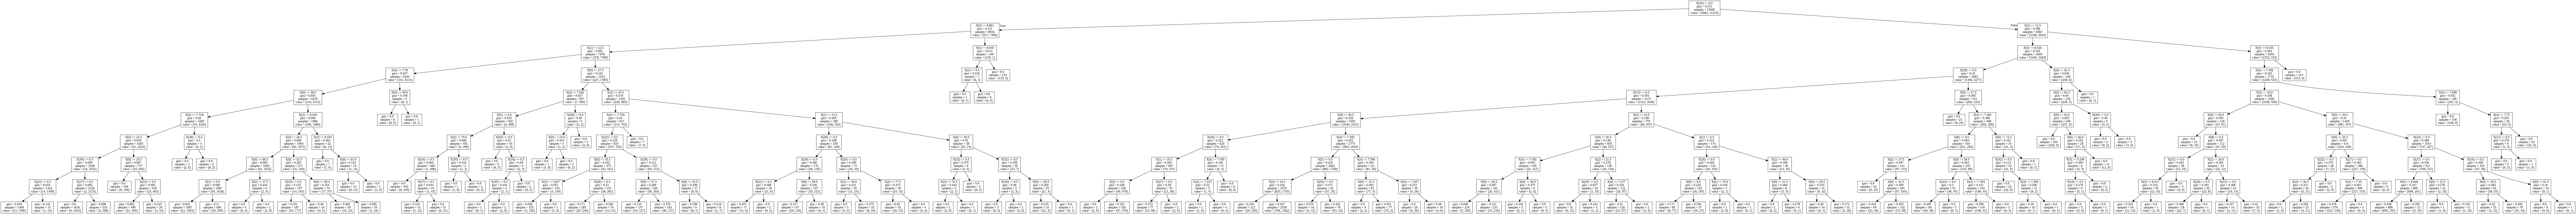

In [0]:
from IPython.display import Image
Image(filename='treeOpt.png')

**Q** Quelle est l’insuffisance de l’implémentation des arbres de décision dans Scikit-learn  par rapport à celle de rpart de R ? Que dire de l’arbre?

**R** Bien implémentés dans scikit-learn mais avec une insuffisance pour leur élagage. Ce n'est pas une pénalisation de la complexité (nombre de feuille) mais la profondeur globale de l'arbre => Risque d'élaguer à des feuilles importantes ou de conserver des feuilles ambigües pour une profondeur donnée.  

L'arbre obtenu est un arbre binaire parfait. Toutes les feuilles sont à la même profondeur.

### 2.5 [Perceptron](http://wikistat.fr/pdf/st-m-app-rn.pdf)

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train.astype(float))  
Xnet_train = scaler.transform(X_train.astype(float))  
# Meme transformation sur le test
Xnet_test = scaler.transform(X_test.astype(float))

In [0]:
tps0=time.perf_counter()
param_grid=[{"hidden_layer_sizes":list([(4,),(5,),(6,)])}]
nnet= GridSearchCV(MLPClassifier(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(Xnet_train, Y_train)
# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps perceptron = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                                    1. - nnetOpt.best_score_,nnetOpt.best_params_))

KeyboardInterrupt: ignored

**Q** Quelle stratégie d’optimisation est adoptée ? Quelle autre pourrait l’être? Quel réseau pourrait également être pris en compte? Quelles sont les fonctions d’activation des neurones?  

**R** On optimise le nombre de noeud sur le layer intermédiaire du MLP. On pourrait également optimiser le nombre de layer. Les neuronnes utilisent une fonction ReLU

In [0]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(Xnet_test,Y_test)

In [0]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(Xnet_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

income   incLow  incHigh
row_0                   
incHigh     278      764
incLow     3494      464


### 2.6 [Forêts aléatoires](http://wikistat.fr/pdf/st-m-app-agreg.pdf)
**Q** Commenter les choix de tous les paramètres.

In [0]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(X_train,Y_train)
print(1-rfFit.oob_score_)

0.12553333333333339


In [0]:
# erreur de prévision sur le test
1-rfFit.score(X_test,Y_test)

0.12460000000000004

In [0]:
# optimisation du paramètre
tps0=time.perf_counter()
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),param,cv=10,n_jobs=-1)
rfOpt=rf.fit(X_train, Y_train)
# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps r forest = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                                    1. - rfOpt.best_score_,rfOpt.best_params_))

Temps r forest = 49.157753, Meilleur taux = 0.128200, Meilleur paramètre = {'max_features': 6}


In [0]:
# erreur de prévision sur le test
1-rfOpt.score(X_test,Y_test)

0.12580000000000002

In [0]:
# prévision
y_chap = rfFit.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

income   incLow  incHigh
row_0                   
incHigh     241      877
incLow     3500      382


In [0]:
rf= RandomForestClassifier(n_estimators=100,max_features=6)
rfFit=rf.fit(X_train, Y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(20):
    print(X_train.columns[indices[f]], importances[indices[f]])

age 0.17940999546927233
mariStat_Married 0.09653707903474887
hoursWeek 0.0889048501599227
educNum 0.07955891535259052
LcapitalGain 0.06436792537666722
mariStat_Never-Married 0.03534707421108589
capitalGain_cgHigh 0.032631429736377414
LcapitalLoss 0.023257420216589428
occup_Blue-Collar 0.02051041602484892
occup_White-Collar 0.01893553822640151
occup_Professional 0.01724813497319712
workClass_Private 0.0167773727237437
capitalGain_None 0.016357887606476194
sex_ Female 0.016267428277388654
sex_ Male 0.015032347702535111
mariStat_Not-Married 0.014349642306900865
ageQ_Ag1 0.013685598378733921
hoursWeekQ_HW3 0.013440791428251865
ageQ_Ag4 0.012589143605247967
workClass_Self-Employed 0.012199825196987703


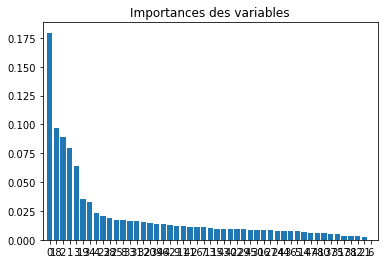

In [0]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

**Q** Comment est obtenu le graphique ? Quelle importance ? Comment interpréter ces résultats ?

### 2.7 [Gradient boosting](http://wikistat.fr/pdf/st-m-app-agreg.pdf)
**Q** Pourquoi pas de paramètre `njobs=-1`? 

**Q** En plus de celui `optimiser`, quels sont les 2 principaux paramètres cet algorithme laissés par défaut ?

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
tps0=time.perf_counter()
param=[{"n_estimators":[200, 250, 300]}]
gbm= GridSearchCV(GradientBoostingClassifier(),param,cv=10)
gbmOpt=gbm.fit(X_train, Y_train)
# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps boosting = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                        1. - gbmOpt.best_score_,gbmOpt.best_params_))

Temps boosting = 1.923291, Meilleur taux = 0.132800, Meilleur paramètre = {'n_estimators': 250}


In [0]:
# erreur de prévision sur le test
1-gbmOpt.score(X_test,Y_test)

0.129

In [0]:
# prévision de l'échantillon test
y_chap = gbmOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

income   incLow  incHigh
row_0                   
incHigh     196      810
incLow     3545      449


## 3 Comparaison des méthodes

### 3.1 [Courbes ROC](http://wikistat.fr/pdf/st-m-app-risque.pdf)
**Q** En cohérence avec les résultats précédents, quelle est la courbe la plus au dessus des autres? Commenter ce graphique, que signifie AUC ?

In [0]:
from sklearn.metrics import roc_curve
listMethod=[["GBM",gbmOpt],["RF",rfOpt],["NN",nnetOpt],["Tree",treeOpt],["Logit",logitOpt]]

/home-local/pbesse/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


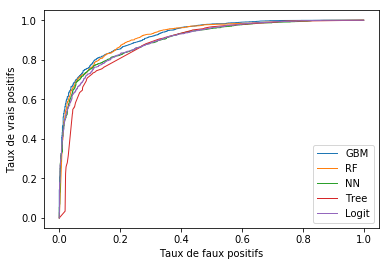

In [0]:
# Courbes ROC des précédents modèles optimaux
for method in enumerate(listMethod):
    probas_ = method[1][1].fit(Xnet_train, Y_train).predict_proba(Xnet_test)
    fpr, tpr, thresholds = roc_curve(Y_test,probas_[:,1], pos_label="incLow")
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0]),
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

### 3.2 [Validation croisée](http://wikistat.fr/pdf/st-m-app-risque.pdf) *Monte Carlo*
**Q** Quelle différence entre la validation croisée Monte Carlo et la V-fold cross validation?

**Q** Les variables sont « standardisées ». Pourquoi ? Est-ce important et pour quelles méthodes? Commenter les résultats. Quelle méthode choisir? Quel autre algorithme serait-il pertinent de tester? 

In [0]:
from sklearn.utils import check_random_state
tps0=time.perf_counter()
check_random_state(11)
# définition des estimateurs
logit= LogisticRegression(penalty="l1",solver="liblinear")
tree = DecisionTreeClassifier()
nnet = MLPClassifier(max_iter=400)
rf   = RandomForestClassifier(n_estimators=200)
gbm  = GradientBoostingClassifier()
# Nombre d'itérations
B=10 # pour utiliser le programme, mettre plutôt B=10
# définition des grilles de paramètres
listMethGrid=[[gbm,{"n_estimators":[200, 250, 300]}],
    [rf,{"max_features":list(range(5,10))}],
    [nnet,{"hidden_layer_sizes":list([(3,),(4,),(5,)])}],
    [tree,{"max_depth":list(range(5,10))}],
    [logit,{"C":[0.8,0.9,1,1.1,1.2]}]]
# Initialisation à 0 
arrayErreur=np.empty((B,5))
for i in range(B):   # itérations sur B échantillons test
    # extraction apprentissage et test
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1000)
    scaler = StandardScaler()  
    scaler.fit(X_train.astype(float))  
    Xnet_train = scaler.transform(X_train.astype(float))  
    # Meme transformation sur le test
    Xnet_test = scaler.transform(X_test.astype(float))
    # optimisation de chaque méthode et calcul de l'erreur sur le test
    for j,(method, grid_list) in enumerate(listMethGrid):
        methodGrid=GridSearchCV(method,grid_list,cv=10,n_jobs=-1).fit(X_train, Y_train)
        methodOpt = methodGrid.best_estimator_
        methFit=methodOpt.fit(Xnet_train, Y_train)
        arrayErreur[i,j]=1-methFit.score(Xnet_test,Y_test)
tps1=time.perf_counter()

/home-local/pbesse/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home-local/pbesse/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home-local/pbesse/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home-local/pbesse/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home-local/pbesse/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

In [0]:
dataframeErreur=pd.DataFrame(arrayErreur,columns=["GBM","RF","NN","Tree","Logit"])
print("Temps execution :",(tps1 - tps0))

Temps execution : 2806.6670326750027


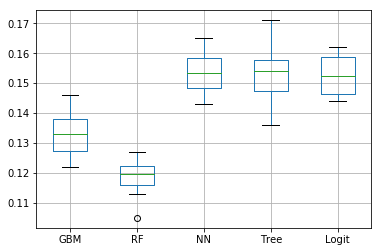

In [0]:
dataframeErreur[["GBM","RF","NN","Tree","Logit"]].boxplot(return_type='dict')
plt.show()

In [0]:
# Moyennes
dataframeErreur.mean()

GBM      0.1330
RF       0.1186
NN       0.1534
Tree     0.1537
Logit    0.1526
dtype: float64

**Q** L'algoritme `GBM` n'a pas été complètement optimisé. Une optimisation fine de l'algorithme `XGBoost` permettra-t-elle une meilleure performance que celle de random forest?

**Q** Les SVM ne font pas partie de la comparaison à cause de temps rédhibitoires d’exécution. A quoi est-ce dû ? Commenter les temps d’exécution des différentes étapes. 

**Q** Les temps d'exécution deviennent longs pour un ordinateur de bureau standard. Comment évaluer l'impact de la taille de l'échantillon sur le temps d'exécution et la précision des prévisions? 

**Q** Est-il réellement nécessaire d'entraîner de type d'algorithme et pour ce type de problème sur de gros jeux de données?